In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# Load The Dataset

In [2]:
df = pd.read_csv(r"C:\Users\kashish trivedi\Downloads\Restaurant_Reviews.tsv", delimiter='\t')


In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
df.shape

(1000, 2)

# Dataset Include 500 Positive and 500 Negative Reviws

In [6]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [7]:
df.describe(include="object").T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
df.dtypes

Review    object
Liked      int64
dtype: object

In [10]:
df['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [12]:
df['length']=df['Review'].apply(len)

# Data Preprocessing 

In [13]:
import nltk 
nltk.download('stopwards')

[nltk_data] Error loading stopwards: Package 'stopwards' not found in
[nltk_data]     index


False

In [14]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [15]:
corpus=[]
for i in range(0,1000):
    review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=df['Review'][i])
    review= review.lower()
    review_words=review.split()
    review_words=[word for word in review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    review =[ps.stem(word) for word in review_words]
    review=' '.join(review)
    corpus.append(review)

In [16]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [17]:
#Creating Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=df.iloc[:,1].values

# Split Data-(1000,1500)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# Model Training

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier =  MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [21]:
y_pred=classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.77
Precision: 0.76
Recall: 0.79
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



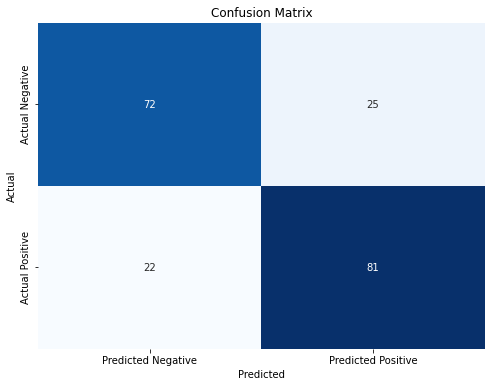

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
#Hyperparameter tuning the Naive Bayes Classifier
best_accuracy=0.0
aplha_val=0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier=MultinomialNB(alpha=i)
    temp_classifier.fit(X_train,y_train)
    temp_y_pred=temp_classifier.predict(X_test)
    score=accuracy_score(y_test,temp_y_pred)
    print("Accuracy score for alpha={} is :{}%".format(round(i,1),round(score*100,2)))
    if score>best_accuracy:
        alpha_val=i
        print('The best accuracy is{}% with alpha value as {}'.format(round(best_accuracy*1000,2),round(aplha_val,1)))

Accuracy score for alpha=0.1 is :78.0%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.2 is :78.5%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.3 is :78.0%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.4 is :78.0%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.5 is :77.5%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.6 is :77.5%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.7 is :77.5%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.8 is :77.0%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=0.9 is :76.5%
The best accuracy is0.0% with alpha value as 0.0
Accuracy score for alpha=1.0 is :76.5%
The best accuracy is0.0% with alpha value as 0.0


In [25]:
classifier =  MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [26]:
def predict_sentiment(sample_review):
    sample_review=re.sub(pattern='[^a-zA-Z]',repl=' ',string=sample_review)
    sample_review= sample_review.lower()
    sample_review_words=sample_review.split()
    sample_review_words=[word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review =[ps.stem(word) for word in sample_review_words]
    final_review=' '.join(final_review)
    temp=cv.transform([final_review]).toarray()
    return classifier.predict(temp)

In [27]:
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[73 24]
 [21 82]]


Accuracy is  77.5 %
Precision is  0.77
Recall is  0.8


In [28]:
# Predicting Values

In [29]:
sample_review='The food is really bad.'
if predict_sentiment(sample_review):
    print('This is Positive Review')
else:
    print('This is Negative Review')

This is Negative Review


In [30]:
sample_review='Food was pretty bad and the service was very slow. '
if predict_sentiment(sample_review):
    print('This is Positive Review')
else:
    print('This is Negative Review')

This is Negative Review


In [31]:
sample_review='The food was absolutely wonderful, from preparartion to ptrsentation, very pleasing .'
if predict_sentiment(sample_review):
    print('This is Positive Review')
else:
    print('This is Negative Review')

This is Positive Review


Random Forest Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.64      0.88      0.74        97
           1       0.82      0.53      0.65       103

    accuracy                           0.70       200
   macro avg       0.73      0.71      0.69       200
weighted avg       0.73      0.70      0.69       200



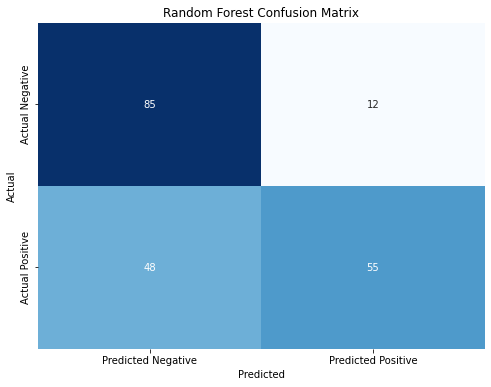

SVM Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.76      0.73        97
           1       0.75      0.68      0.71       103

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.72      0.72      0.72       200



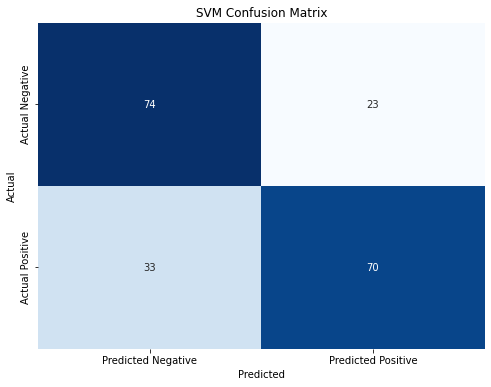

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Model Training and Evaluation - Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
y_rf_pred = rf_classifier.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

# Generate a classification report for Random Forest
rf_report = classification_report(y_test, y_rf_pred)
print(rf_report)

# Generate a confusion matrix for Random Forest
rf_confusion = confusion_matrix(y_test, y_rf_pred)

# Display the confusion matrix as a heatmap for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Model Training and Evaluation - Support Vector Machine (SVM)
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)
y_svm_pred = svm_classifier.predict(X_test)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Generate a classification report for SVM
svm_report = classification_report(y_test, y_svm_pred)
print(svm_report)

# Generate a confusion matrix for SVM
svm_confusion = confusion_matrix(y_test, y_svm_pred)

# Display the confusion matrix as a heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()


In [ ]:
#..........................................Logistic Regreesion....................................

In [34]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[75 22]
 [34 69]]


Accuracy is  72.0 %
Precision is  0.76
Recall is  0.67


### Conclusion 

#### Multinomial Naive Byes accuracy- 77.5%
#### Random Forest Classifier accuracy- 70%
#### Support Vector Machine accuracy -72%
#### logisric Regression accuracy- 72%